# preprocessing the data

In [5]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.preprocessing import *
from scripts.logger import setup_logger

## logger setup

In [6]:
logger = setup_logger('preprocess_logger', '../logs/preprocess.log')

## Accessing the data

In [7]:
data_train = pd.read_csv('../data/train.csv',low_memory=False, index_col=False)
data_store = pd.read_csv('../data/store.csv',low_memory=False, index_col=False)
data_test=pd.read_csv('../data/test.csv', low_memory=False, index_col=False)

### logging data input

In [8]:
logger.info('Training, test, and store data loaded.')

## understanding the data

In [9]:
data_train.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [10]:
data_store.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [11]:
data_test.head(3)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0


In [12]:
print ('shape of training data:' ,data_train.shape)
print ('shape of store data:' ,data_store.shape)
print('shape of test data:',data_test.shape)

shape of training data: (1017209, 9)
shape of store data: (1115, 10)
shape of test data: (41088, 8)


In [13]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [14]:
data_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


## merging store and train data

In [15]:
data = pd.merge(data_train, data_store, on='Store', how='left')
logger.info('merging training and store data')

### Exploring the merged data

In [16]:
data.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [18]:
data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [19]:
data_test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [20]:
data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [21]:
data_store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## Data Quality
## checking for missing values

In [22]:
missing_data = check_missing_values(data)
missing_data

,Missing Values,% of Total Values,Data type
PromoInterval,508031,49.94,object
Promo2SinceYear,508031,49.94,float64
Promo2SinceWeek,508031,49.94,float64
CompetitionOpenSinceYear,323348,31.79,float64
CompetitionOpenSinceMonth,323348,31.79,float64
CompetitionDistance,2642,0.26,float64
DayOfWeek,0,0.00,int64
Promo2,0,0.00,int64
Assortment,0,0.00,object
Store,0,0.00,int64


In [23]:
test_data = check_missing_values(data_test)
test_data

,Missing Values,% of Total Values,Data type
Open,11,0.03,float64
Id,0,0.00,int64
Store,0,0.00,int64
DayOfWeek,0,0.00,int64
Date,0,0.00,object
Promo,0,0.00,int64
StateHoliday,0,0.00,object
SchoolHoliday,0,0.00,int64


## Handling Missing Values

For the numeric columns ['Promo2SinceWeek', 'Promo2SinceYear'], we will substitute missing values with 0 to signify the absence of promotions for those stores.  
Similarly, we will replace missing values in the ['PromoInterval'] column with 0 to indicate that these stores do not engage in promotions during any month.

In [24]:
data['Promo2SinceWeek'] = data['Promo2SinceWeek'].fillna(0)
data['Promo2SinceYear'] = data['Promo2SinceYear'].fillna(0)
data['PromoInterval'] = data['PromoInterval'].fillna(0)
logger.info('from the merged data  rows with missing values are filled with 0')

The columns [CompetitionOpenSinceYear, CompetitionOpenSinceMonth] indicate the presence of competition near the stores. The missing values suggest that no competition was present.

In [25]:
data['CompetitionOpenSinceYear'] = data['CompetitionOpenSinceYear'].fillna(0)
data['CompetitionOpenSinceMonth'] = data['CompetitionOpenSinceMonth'].fillna(0)
logger.info('from the merged data rows  missing rows that indicate no competion are filled with 0')

The column ['CompetitionDistance'] represents the distance to the nearest competitor. Missing values indicate that there is no competitor nearby.  

To address this, we will fill the missing values with the median competition distance.

In [26]:
median_distance = data['CompetitionDistance'].median()
data['CompetitionDistance'] = data['CompetitionDistance'].fillna(median_distance)
logger.info(' missing values from CompetionDistance coulumns is filled with most frequent value')

The ['Open'] column in the test data indicates whether a store is open. To handle the missing values, we will fill them with the most frequent value (either 0 or 1). This method ensures that the imputation reflects the predominant status of the stores in the dataset.

In [27]:
mode_open = data_test['Open'].mode()[0]
data_test['Open'] = data_test['Open'].fillna(mode_open)

now that we have handled all the missing values lets comfirm there are indeed no missing values in our data.

In [28]:
data.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [29]:
calculate_missing_percentage(data_test)
calculate_missing_percentage(data)

The dataset has 0.0% missing values.
The dataset has 0.0% missing values.


## change data type to datetime format

In [30]:
data['Date'] = pd.to_datetime(data["Date"])
data_test['Date'] = pd.to_datetime(data_test["Date"])

## check for outliers

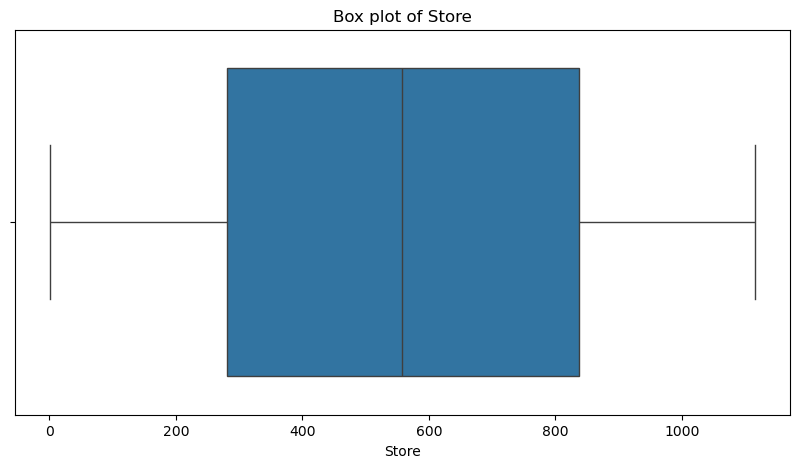

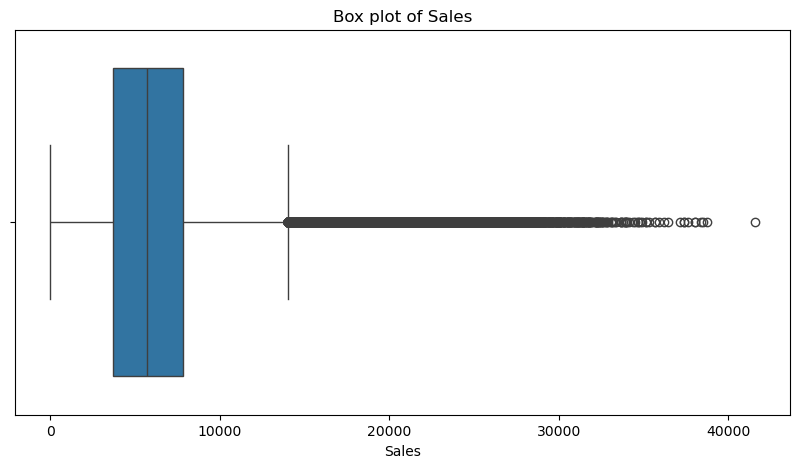

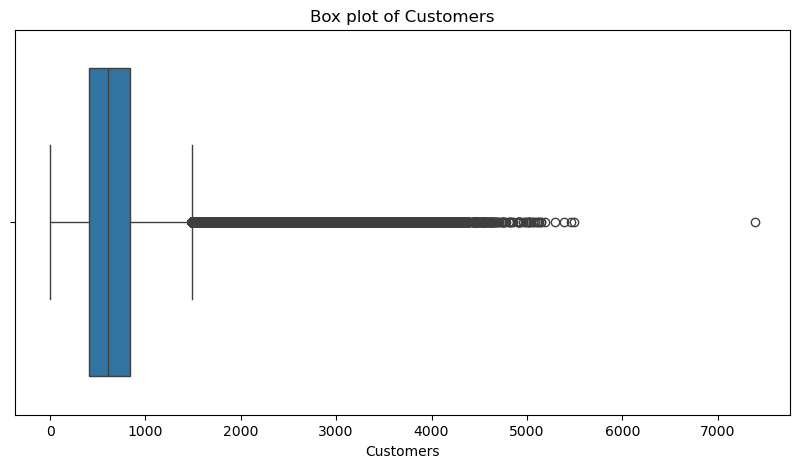

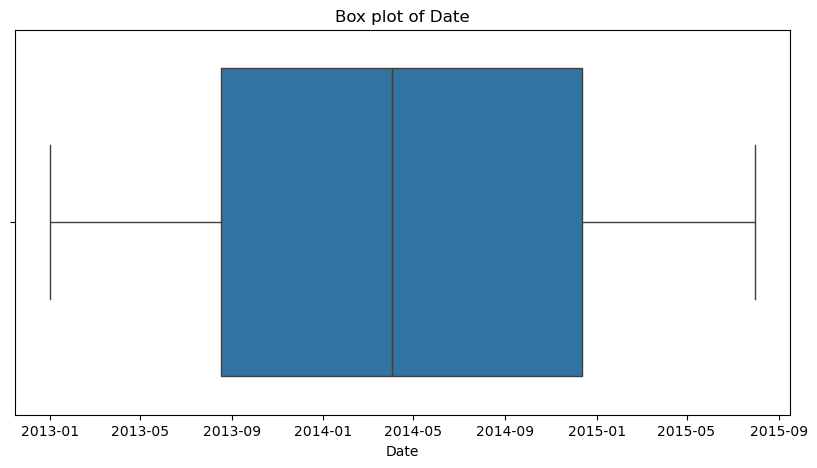

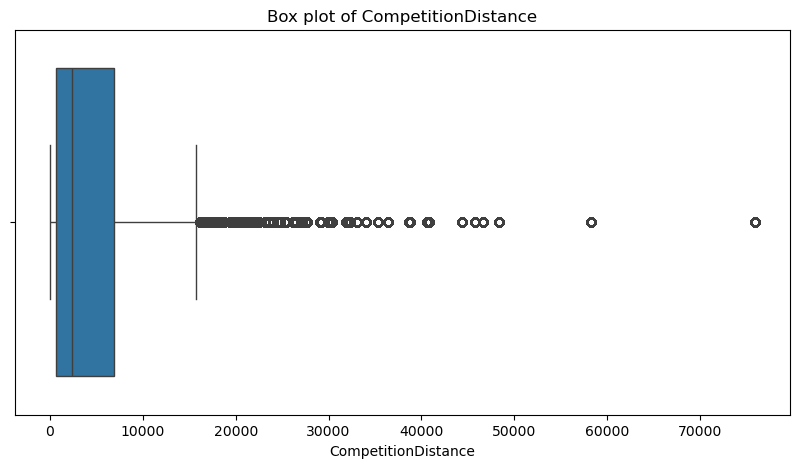

In [31]:
columns = ['Store','Sales', 'Customers', 'Date', 'CompetitionDistance']
# outlier plot for each variable in columns of merged dataset 
cols = data[columns]
outlier_box_plots(cols)

In [32]:
data.to_csv('../data/train_cleaned.csv', index=False)
data_test.to_csv('../data/test_cleaned.csv', index=False)

In [33]:
logger.info('saving the cleaned data as a new dataset')